In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## Stratified Shuffling of data

### Create new dfs for test and training data

In [38]:
df = pd.read_csv('./data.csv')
data_tr = pd.DataFrame(columns=df.columns)
data_ts = pd.DataFrame(columns=df.columns)

### Split the data

In [39]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for ti, tti in split.split(df, df['ocean_proximity']):
    data_tr = df.iloc[ti]
    data_ts = df.iloc[tti]
data_tr.to_csv('./train.csv', index=False)
data_ts.to_csv('./test.csv', index=False)

## Exploratory data analysis (EDA)

In [40]:
df = pd.read_csv("./train.csv")
print(df.head())
print(df.tail())
df.info()  # get a overview of structure of the data
print(df.describe())  # get a overview of the data
print(df['ocean_proximity'].value_counts())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -119.80     36.78                43.0       2382.0           431.0   
1    -118.34     33.99                34.0        397.0           132.0   
2    -117.80     33.78                17.0       4138.0           805.0   
3    -121.33     37.98                10.0       1564.0           397.0   
4    -117.92     33.88                32.0       1683.0           273.0   

   population  households  median_income  median_house_value ocean_proximity  
0       874.0       380.0         3.5542             96500.0          INLAND  
1       250.0       121.0         1.6750            166700.0       <1H OCEAN  
2      2442.0       780.0         4.7804            242000.0       <1H OCEAN  
3       643.0       347.0         2.7031            150000.0          INLAND  
4       719.0       263.0         5.3649            243600.0       <1H OCEAN  
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms

## Take an overview of the data

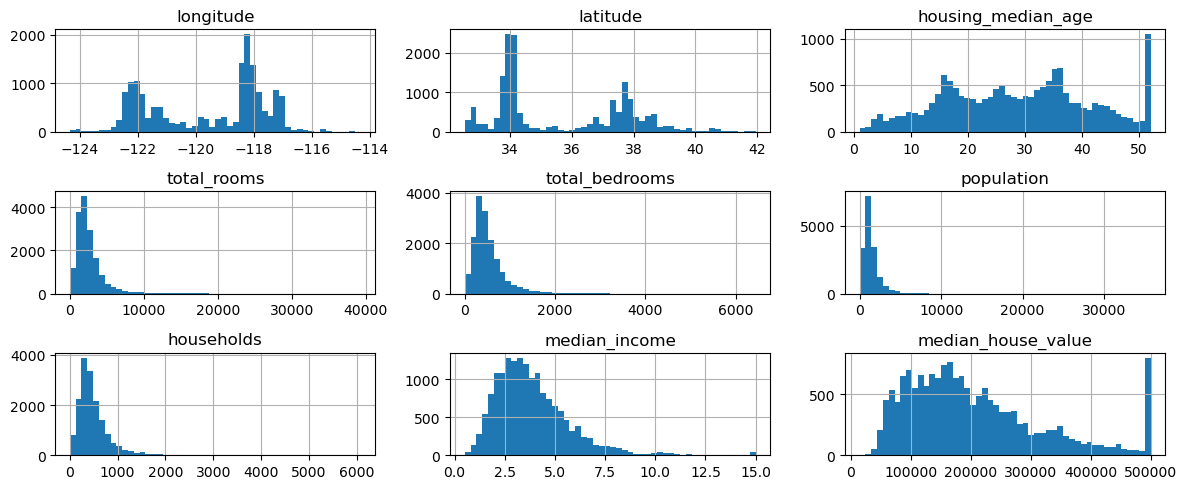

In [41]:
df.hist(bins=50, figsize=(12, 5))
plt.tight_layout()
plt.show()

## Visualising the data

### Geographical scatter plot

<Axes: xlabel='longitude', ylabel='latitude'>

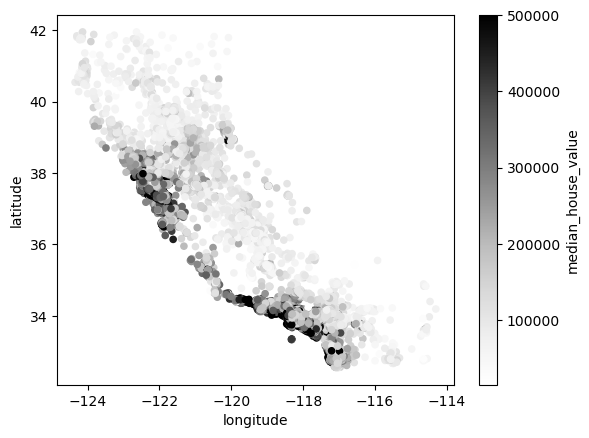

In [42]:
df.plot(kind='scatter', x='longitude', y='latitude',
        cmap='Grays', c='median_house_value')

### Correlation Matrix

Calculate relationship between two variables.

In [43]:
df2 = df.drop('ocean_proximity', axis=1)
print(df2.corr())

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924775           -0.109436     0.041745   
latitude            -0.924775  1.000000            0.012785    -0.034101   
housing_median_age  -0.109436  0.012785            1.000000    -0.356687   
total_rooms          0.041745 -0.034101           -0.356687     1.000000   
total_bedrooms       0.068659 -0.066569           -0.314038     0.929975   
population           0.097978 -0.107614           -0.287994     0.854798   
households           0.054690 -0.070935           -0.296844     0.917670   
median_income       -0.014024 -0.081215           -0.122388     0.199985   
median_house_value  -0.040574 -0.150477            0.104590     0.135182   

                    total_bedrooms  population  households  median_income  \
longitude                 0.068659    0.097978    0.054690      -0.014024   
latitude                 -0.066569   -0.107614   -0.070935      -0.081215   
housing_

### Scatter Matrix

Shows the relationship between each variable visually.

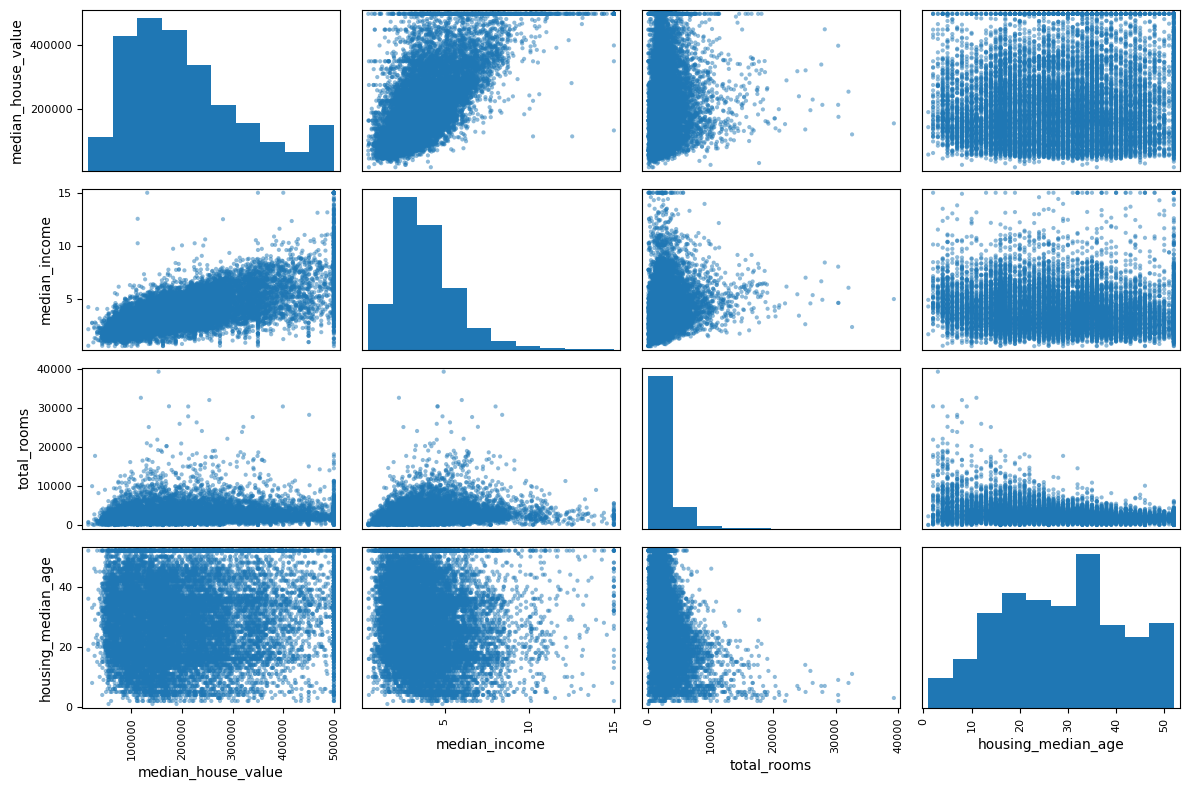

In [44]:
attr = ["median_house_value", "median_income",
        "total_rooms", "housing_median_age"] # shows relationship between each variable.
pd.plotting.scatter_matrix(df[attr], figsize=(12, 8))
plt.tight_layout()

## Preparing the data for training

In [45]:
features = df.drop('median_house_value', axis=1)
labels = df['median_house_value'].copy()

## Imputing missing values

In [46]:
imputer = SimpleImputer(strategy='median')
df_num = df.select_dtypes(include = [np.number])
imputer.fit(df_num) # learns medians of each column
x = imputer.transform(df_num) # replaces missing values with the medians.
features = pd.DataFrame(x, columns=df_num.columns)
print(features)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -119.80     36.78                43.0       2382.0           431.0   
1        -118.34     33.99                34.0        397.0           132.0   
2        -117.80     33.78                17.0       4138.0           805.0   
3        -121.33     37.98                10.0       1564.0           397.0   
4        -117.92     33.88                32.0       1683.0           273.0   
...          ...       ...                 ...          ...             ...   
16507    -118.32     34.03                31.0       2206.0           501.0   
16508    -121.89     37.34                20.0       1106.0           494.0   
16509    -118.21     34.03                45.0       1860.0           472.0   
16510    -118.30     34.05                31.0       1744.0           720.0   
16511    -122.82     38.33                25.0       3067.0           569.0   

       population  households  median_income  media

## Converting labels to numbers

### Ordinal encoding

Not recommended (here)

In [47]:
o_encoder = OrdinalEncoder()
housing_cat = o_encoder.fit_transform(df[['ocean_proximity']])
housing_cat

array([[1.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

### Unordered encoding

In [48]:
u_encoder = OneHotEncoder(sparse_output = False)
housing_cat = u_encoder.fit_transform(df[['ocean_proximity']])
housing_cat

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [49]:
u_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [50]:
df = features

In [51]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0
1,-118.34,33.99,34.0,397.0,132.0,250.0,121.0,1.6750,166700.0
2,-117.80,33.78,17.0,4138.0,805.0,2442.0,780.0,4.7804,242000.0
3,-121.33,37.98,10.0,1564.0,397.0,643.0,347.0,2.7031,150000.0
4,-117.92,33.88,32.0,1683.0,273.0,719.0,263.0,5.3649,243600.0
...,...,...,...,...,...,...,...,...,...
16507,-118.32,34.03,31.0,2206.0,501.0,1194.0,435.0,1.9531,227800.0
16508,-121.89,37.34,20.0,1106.0,494.0,851.0,448.0,0.8894,350000.0
16509,-118.21,34.03,45.0,1860.0,472.0,1893.0,456.0,2.6573,141800.0
16510,-118.30,34.05,31.0,1744.0,720.0,2034.0,633.0,2.2684,193800.0


In [52]:
house = pd.DataFrame(housing_cat, columns = ['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'])

In [53]:
house

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
16507,1.0,0.0,0.0,0.0,0.0
16508,1.0,0.0,0.0,0.0,0.0
16509,1.0,0.0,0.0,0.0,0.0
16510,1.0,0.0,0.0,0.0,0.0


In [54]:
df = pd.concat([df, house], axis = 1)

In [55]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,0.0,1.0,0.0,0.0,0.0
1,-118.34,33.99,34.0,397.0,132.0,250.0,121.0,1.6750,166700.0,1.0,0.0,0.0,0.0,0.0
2,-117.80,33.78,17.0,4138.0,805.0,2442.0,780.0,4.7804,242000.0,1.0,0.0,0.0,0.0,0.0
3,-121.33,37.98,10.0,1564.0,397.0,643.0,347.0,2.7031,150000.0,0.0,1.0,0.0,0.0,0.0
4,-117.92,33.88,32.0,1683.0,273.0,719.0,263.0,5.3649,243600.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-118.32,34.03,31.0,2206.0,501.0,1194.0,435.0,1.9531,227800.0,1.0,0.0,0.0,0.0,0.0
16508,-121.89,37.34,20.0,1106.0,494.0,851.0,448.0,0.8894,350000.0,1.0,0.0,0.0,0.0,0.0
16509,-118.21,34.03,45.0,1860.0,472.0,1893.0,456.0,2.6573,141800.0,1.0,0.0,0.0,0.0,0.0
16510,-118.30,34.05,31.0,1744.0,720.0,2034.0,633.0,2.2684,193800.0,1.0,0.0,0.0,0.0,0.0


## Feature Scaling

Mapping the features on a similar range. Here, -1 to 1

#### Min-Max Scaling (Normalization)

We map everything in specified range (usually -1 to 1 or 0 to 1). However, this is sensitive to outliers.

In [56]:
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_v = scaler.fit_transform(df)

In [57]:
scaled_v = pd.DataFrame(scaled_v, df.index, df.columns)
scaled_v

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-0.093625,-0.098831,0.647059,-0.879127,-0.866832,-0.951176,-0.875658,-0.578723,-0.663915,-1.0,1.0,-1.0,-1.0,-1.0
1,0.197211,-0.691817,0.294118,-0.980109,-0.959646,-0.986154,-0.960855,-0.837919,-0.374431,1.0,-1.0,-1.0,-1.0,-1.0
2,0.304781,-0.736451,-0.372549,-0.789795,-0.750737,-0.863281,-0.744079,-0.409594,-0.063917,1.0,-1.0,-1.0,-1.0,-1.0
3,-0.398406,0.156217,-0.647059,-0.920741,-0.877386,-0.964125,-0.886513,-0.696115,-0.443297,-1.0,1.0,-1.0,-1.0,-1.0
4,0.280876,-0.715197,0.215686,-0.914687,-0.915878,-0.959864,-0.914145,-0.328975,-0.057319,1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.201195,-0.683316,0.176471,-0.888081,-0.845103,-0.933238,-0.857566,-0.799561,-0.122474,1.0,-1.0,-1.0,-1.0,-1.0
16508,-0.509960,0.020191,-0.254902,-0.944040,-0.847276,-0.952465,-0.853289,-0.946277,0.381442,1.0,-1.0,-1.0,-1.0,-1.0
16509,0.223108,-0.683316,0.725490,-0.905682,-0.854105,-0.894055,-0.850658,-0.702432,-0.477111,1.0,-1.0,-1.0,-1.0,-1.0
16510,0.205179,-0.679065,0.176471,-0.911584,-0.777122,-0.886152,-0.792434,-0.756072,-0.262679,1.0,-1.0,-1.0,-1.0,-1.0


#### Standardisation (Z-Score Scaling)

This is insensitive to outliers. We don't pass any range. 
Note: Do not scale categorical values. Here, ocean_proximity columns are categorical values

In [58]:
scaler = StandardScaler()
df1 = df.drop(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'], axis=1).copy() # Do not scale!
df2 = df[['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']].copy()
scaled_v = scaler.fit_transform(df1)

In [59]:
df = pd.DataFrame(scaled_v, df1.index, df1.columns)
df = pd.concat([df, df2], axis = 1)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-0.109823,0.531578,1.136231,-0.108850,-0.247698,-0.482060,-0.310020,-0.164478,-0.959171,0.0,1.0,0.0,0.0,0.0
1,0.619587,-0.772348,0.420106,-1.030194,-0.973136,-1.034853,-0.998738,-1.159597,-0.350070,1.0,0.0,0.0,0.0,0.0
2,0.889369,-0.870493,-0.932575,0.706203,0.659706,0.907011,0.753636,0.484850,0.303282,1.0,0.0,0.0,0.0,0.0
3,-0.874205,1.092406,-1.489562,-0.488527,-0.330189,-0.686700,-0.397772,-0.615173,-0.494970,0.0,1.0,0.0,0.0,0.0
4,0.829417,-0.823757,0.260967,-0.433293,-0.631040,-0.619372,-0.621140,0.794368,0.317165,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.629579,-0.753654,0.181397,-0.190541,-0.077863,-0.198576,-0.163767,-1.012331,0.180074,1.0,0.0,0.0,0.0,0.0
16508,-1.153979,0.793298,-0.693867,-0.701110,-0.094846,-0.502435,-0.129199,-1.575607,1.240361,1.0,0.0,0.0,0.0,0.0
16509,0.684535,-0.753654,1.295370,-0.351138,-0.148223,0.420659,-0.107925,-0.639426,-0.566119,1.0,0.0,0.0,0.0,0.0
16510,0.639571,-0.744307,0.181397,-0.404980,0.453478,0.545569,0.362742,-0.845366,-0.114933,1.0,0.0,0.0,0.0,0.0


#### Seperate features and labels

In [60]:
df_features = df.drop('median_house_value', axis = 1).values
df_labels = df['median_house_value'].copy()

### Compare and Select the best model using cross validation

#### Linear Regressor

In [61]:
l_reg = LinearRegression()

# cross validation
l_rmse = -cross_val_score(l_reg, df_features, labels, scoring = "neg_root_mean_squared_error", cv = 10)
print(f'Linear regressor:\n{pd.Series(l_rmse).describe()}')

Linear regressor:
count       10.000000
mean     68957.308701
std       2705.081473
min      65721.006759
25%      66787.138240
50%      68908.383034
75%      70061.393304
max      74947.700221
dtype: float64


#### DecisionTree Regressor

In [62]:
dt_reg = DecisionTreeRegressor()

# cross validation
dt_rmse = -cross_val_score(dt_reg, df_features, labels, scoring = "neg_root_mean_squared_error", cv = 10)
print(f"Decision tree regressor:\n{pd.Series(dt_rmse).describe()}")

Decision tree regressor:
count       10.000000
mean     67823.651761
std       2620.758580
min      62585.087766
25%      66404.977574
50%      68833.854101
75%      69125.555890
max      71304.417165
dtype: float64


#### Random Forest Regressor

In [63]:
rf_reg = RandomForestRegressor()

# cross validation
rf_rmse = -cross_val_score(rf_reg, df_features, labels, scoring = "neg_root_mean_squared_error", cv = 10)
print(f"Random forest regressor:\n{pd.Series(rf_rmse).describe()}")

Random forest regressor:
count       10.000000
mean     48733.073084
std       1485.283342
min      46203.350240
25%      47867.091516
50%      48353.970602
75%      49758.997077
max      51249.134054
dtype: float64


#### Conclusion

Random forest is better.